# 4.8: 量子核与懒惰态

> References:
> _Generative tensor network classification model for supervised machine learning_
> _Non-Parametric Semi-Supervised Learning in Many-Body Hilbert Space with Rescaled Logarithmic Fidelity_

## 懒惰态

GMPSC (或更一般的GTNC) 可简单地构造出NLL的极小点：

$$|\psi\rangle = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} e^{i\theta_n}|\Phi^{(n)}\rangle$$

$|\Phi^{(n)}\rangle = \prod_{l=0}^{L-1}|\phi^{(n,l)}\rangle$，其中$|\phi^{(n,l)}\rangle$ 为第 $n$ 个样本的第 $l$ 个特征经过特征映射后得到的单比特量子态，$L$ 为每个样本的总特征数，$N$ 为总样本数；$\theta_n$ 代表第 $n$ 个样本对应的相位因子，由于 $|e^{i\theta_n}| = 1$，$\theta_n$ 的取值不影响样本出现的概率。

上述量子态满足使NLL极小的等概率分布，即

$$|\langle\Phi^{(0)}|\psi\rangle|^2 \approx |\langle\Phi^{(1)}|\psi\rangle|^2 \approx ... \approx |\langle\Phi^{(N-1)}|\psi\rangle|^2 \approx \frac{1}{N}$$

(参考4.4节)

我们将该态成为懒惰量子态 (lazy quantum state)，或简称懒惰态。

### 前提条件

等概率分布近似成立的前提：正交灾难，即两个样本量子态间的保真度满足

$$f(\boldsymbol{x}^{(n)}, \boldsymbol{x}^{(n')}) = |\langle\Phi^{(n')}|\Phi^{(n)}\rangle| \approx \delta_{n'n}$$

> $\delta$ 是一个矩阵，对角线元素为 1，非对角线元素近似为 0

此时，某个样本出现的概率满足

$$
\begin{align}
p(\boldsymbol{x}^{(n')}) 
&= |\langle\Phi^{(n')}|\psi\rangle|^2 \\
&= \frac{1}{N}\left|\sum_{n=0}^{N-1}\langle\Phi^{(n')}|e^{i\theta_n}\Phi^{(n)}\rangle\right|^2 \\
&\lesssim \frac{1}{N}\sum_{n=0}^{N-1}\left|\langle\Phi^{(n')}|e^{i\theta_n}\Phi^{(n)}\rangle\right|^2 \\
&\approx \frac{1}{N}
\end{align}
$$

例：cos-sin特征映射中 $x_l^{(n)} \rightarrow \cos\frac{\pi}{2}x_l^{(n)}|0\rangle + \sin\frac{\pi}{2}x_l^{(n)}|1\rangle$（见第三章相关内容），有

$$
\begin{align}
f(\boldsymbol{x}^{(n)}, \boldsymbol{x}^{(n')})
&= \prod_{l=0}^{L-1} (\cos\frac{\pi}{2}x_l^{(n)} \cos\frac{\pi}{2}x_l^{(n')} +  \sin\frac{\pi}{2}x_l^{(n)} \sin\frac{\pi}{2}x_l^{(n')}) \\
&= \prod_{l=0}^{L-1}\cos\frac{\pi}{2}(x_l^{(n)} - x_l^{(n')})
\end{align}
$$

保真度是由 $L$ 个小于等于1的数连乘获得，因此其值指数接近于零。

## 核函数 Kernel Function

保真度 $f(x^{(n)},x^{(n')}) = \prod_{l=0}^{L-1} \cos\frac{\pi}{2}(x_l^{(n)} - x_l^{(n')})$ 正是**余弦相似性**(cosine similarity)，为"经典"机器学习中常用的核函数(kernel function)。可见，特征映射与量子态保真度联合定义的样本相似性度量，可以是一个"经典"的相似性度量。

(注：核函数定义为从两个样本到距离度量值的半正定函数)

克服正交灾难的方法之一：发展新的核函数，例如负对数保真度

$$F(x^{(n)},x^{(n')}) = -\frac{1}{L}\ln f(x^{(n)},x^{(n')}) = -\frac{1}{L}\sum_{l=0}^{L-1}\ln\cos\frac{\pi(x_l^{(n)}-x_l^{(n')})}{2}$$

显然 $F$ 仅随 $L$ 线性变化，从而避免了正交灾难。

另一个例子：重标度对数保真度

$$f(x^{(n)},x^{(n')};\beta) = \beta^{F(x^{(n)},x^{(n')})}$$

重标度因子 $\beta$ 控制"发散"速度，一般取 $\beta > 1$。当 $\beta=e$ 时，重标度对数保真度还原为原来的保真度。

小结：
* 核函数为从两个样本到二者间测度的映射，量子核函数由**量子特征映射**与（希尔伯特空间中）量子态间的**距离测度函数**共同定义
* 可通过定义量子核函数，避免希尔伯特空间中的正交灾难，并调节样本间的相对距离
* 用不同的核函数定义可避免正交灾难，但并不影响量子态间的正交性（这里的正交性总是由内积或保真度定义），因此并不影响懒惰态的等概率分布推导


### 用量子核函数实现降维可视化

利用统计近邻嵌入 (t-stochastic neighbor embedding, 简称t-SNE) 方法进行降维可视化 (visualization)

> Reference: _Stochastic neighbor embedding_

什么是降维可视化：我们可以直接看到1到3维数据的分布，例如空气中的灰尘分布，其中每个灰尘的位置为一个3维向量。但我们无法直观地"看到"高维数据的分布。可通过将高维数据映射为低维数据实现可视化，映射过程中要求尽量保持高、低维空间数据分布的一致性。

降维与核函数的关系：核函数将影响并刻划数据分布及两个空间中分布的一致性。

In [1]:
# |default_exp algorithms.quantum_kernels
# |export
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensor_network.utils.data import load_mnist_images
from typing import Literal

In [2]:
# parameters
cache_path = "datasets/MNIST"
classes = [0, 1, 2]
sample_num_per_class = 2000

perplexity = 20
device = torch.device("cpu")

In [3]:
data = []
labels = []

for c in classes:
    images = load_mnist_images(
        cache_path=cache_path,
        num=sample_num_per_class,
        from_subset="all",
        shuffle=True,
        classes=c,
        normalization=False,
    )
    data.append(images.reshape(images.shape[0], -1).to(device))
    labels.append(torch.full((images.shape[0],), c, device=device, dtype=torch.long))

mnist_samples = torch.cat(data, dim=0)
mnist_sample_labels = torch.cat(labels, dim=0)

#### Negative Log Likelihood with Cos-Sin Feature Mapping

In [4]:
# |export


def _check_samples(samples: torch.Tensor):
    assert samples.ndim == 2  # (N samples, feature num)
    assert samples.min() >= 0.0, f"samples.min(): {samples.min()}"
    assert samples.max() <= 1.0, f"samples.max(): {samples.max()}"


def metric_matrix_neg_log_cos_sin(
    samples: torch.Tensor,
    theta: float = torch.pi / 2 - 1e-7,
    calculation_method: Literal["deduplicate", "no_deduplicate"] = "deduplicate",
) -> torch.Tensor:
    """
    Calculate the distance matrix between samples.

    Args:
        samples: samples of shape (N samples, feature num)
        theta: cossin mapping theta
        calculation_method: "deduplicate" or "no_deduplicate", "deduplicate" use symmetry to avoid duplicate calculation

    Returns:
        distance matrix of shape (N samples, N samples)
    """
    _check_samples(samples)
    assert torch.pi / 2 >= theta >= 0.0
    assert calculation_method in ["deduplicate", "no_deduplicate"]
    sample_num = samples.shape[0]
    if calculation_method == "deduplicate":
        metric = torch.zeros(sample_num, sample_num, device=samples.device, dtype=samples.dtype)
        for n in range(sample_num - 1):
            sample_n = samples[n].reshape(1, -1)  # (1, feature num)
            others = samples[n + 1 :]  # (sample_num - n - 1, feature num)
            diff = sample_n - others  # (sample_num - n - 1, feature num)
            distances = -torch.log(torch.cos(diff * theta)).mean(dim=1)  # (sample_num - n - 1)
            assert not torch.isnan(distances).any(), "if there's nan, try to reduce theta"
            metric[n, n + 1 :] = distances
            metric[n + 1 :, n] = distances
    else:
        samples = samples.unsqueeze(0)  # (1, sample_num, feature num)
        others = samples.transpose(0, 1)  # (sample_num, 1, feature num)
        diff = samples - others  # (sample_num, sample_num, feature num)
        metric = -torch.log(torch.cos(diff * theta)).mean(dim=2)  # (sample_num, sample_num)

        for n in range(sample_num):
            metric[n, n] = 0.0

        assert not torch.isnan(metric).any(), "if there's nan, try to reduce theta"

    return metric

In [5]:
# Test
import tensor_network.setup_ref_code_import as _
from Library.MathFun import metric_matrix_neg_log_cos_sin as metric_matrix_neg_log_cos_sin_ref


sample_num = 10
samples = torch.rand(sample_num, 3)

dist_ref = metric_matrix_neg_log_cos_sin_ref(samples)

# fix a bug in the reference code, see https://github.com/ranshiju/Python-for-Tensor-Network-Tutorial/issues/10
for n in range(sample_num):
    dist_ref[n, n] = 0.0

dist = metric_matrix_neg_log_cos_sin(samples, calculation_method="no_deduplicate")

assert torch.allclose(dist, dist_ref), f"{dist_ref}"

dist = metric_matrix_neg_log_cos_sin(samples, calculation_method="deduplicate")

assert torch.allclose(dist, dist_ref), f"{dist_ref}"

#### Visualization

In [6]:
dist_euclidean = torch.cdist(mnist_samples, mnist_samples, p=2)
dist_nll_cossin = metric_matrix_neg_log_cos_sin(mnist_samples)

resc_betas = [1.01, 1.05, 1.1, 1.3]
dist_resc = {}
for beta in resc_betas:
    dist_resc[beta] = beta**dist_nll_cossin

In [7]:
def visualize_tsne(
    *,
    sample_distances: torch.Tensor,
    labels: torch.Tensor,
    perplexity: float,
    learning_rate: float | Literal["auto"] = "auto",
):
    """
    Create projection from data points to 2D space using t-SNE.

    Args:
        sample_distances: distance matrix of shape (N samples, N samples)
        labels: labels of shape (N samples,)
        perplexity: perplexity of t-SNE
        learning_rate: learning rate of t-SNE
    """
    assert sample_distances.ndim == 2
    sample_num = sample_distances.shape[0]
    assert sample_num == sample_distances.shape[1]
    assert labels.ndim == 1
    assert labels.shape[0] == sample_num
    assert sample_distances.min() >= 0.0, f"sample_distances.min(): {sample_distances.min()}"
    assert perplexity > 0.0
    assert learning_rate == "auto" or learning_rate > 0.0

    tsne = TSNE(
        perplexity=perplexity,
        init="random",
        n_components=2,
        learning_rate=learning_rate,
        metric="precomputed",
    )

    projected_samples = tsne.fit_transform(sample_distances)
    x = projected_samples[:, 0]
    x_min = x.min()
    x_max = x.max()
    x = (x - x_min) / (x_max - x_min)
    y = projected_samples[:, 1]
    y_min = y.min()
    y_max = y.max()
    y = (y - y_min) / (y_max - y_min)

    plt.figure(figsize=(4, 4))
    unique_labels = torch.unique(labels).tolist()
    colors = {l: plt.cm.tab10(l) for l in unique_labels}
    for i in range(sample_num):
        plt.text(
            x[i],
            y[i],
            str(labels[i].item()),
            color=colors[labels[i].item()],
            fontdict={"weight": "bold", "size": 9},
        )
    plt.xticks([])
    plt.yticks([])
    plt.show()

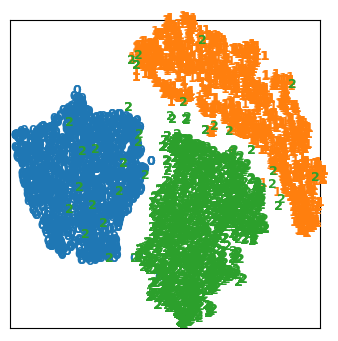

In [8]:
visualize_tsne(
    sample_distances=dist_euclidean,
    labels=mnist_sample_labels,
    perplexity=perplexity,
    learning_rate="auto",
)

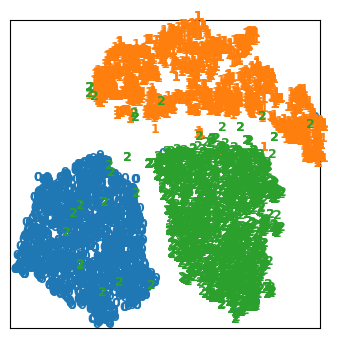

In [9]:
visualize_tsne(
    sample_distances=dist_nll_cossin,
    labels=mnist_sample_labels,
    perplexity=perplexity,
    learning_rate="auto",
)

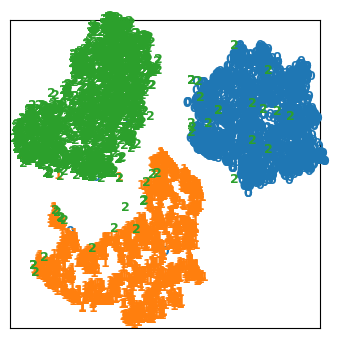

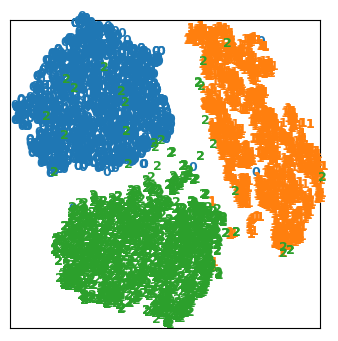

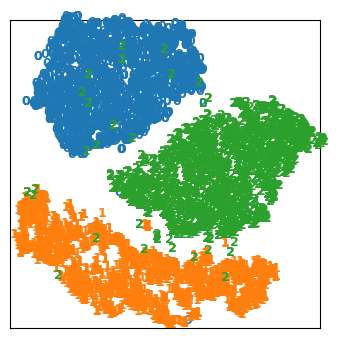

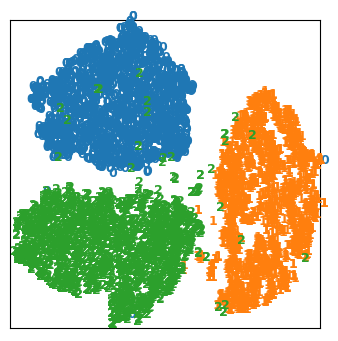

In [10]:
for beta in resc_betas:
    visualize_tsne(
        sample_distances=dist_resc[beta],
        labels=mnist_sample_labels,
        perplexity=perplexity,
        learning_rate="auto",
    )

### 基于核函数的监督分类方法

基本思想：计算样本到各个类带标签样本的距离，找出距离最小的那一类，即为分类预测。

回顾GTNC（4.7节），分类预测为

$$\tilde{c} = \operatorname{argmax}_c p(y|c) = \operatorname{argmax}_c |\langle\Phi|\psi^{[c]}\rangle|^2$$

$|\psi^{[c]}\rangle$ 为近似给出等概率分布的量子态，显然可以替换成懒惰态，于是有

$$p(y|c) = |\langle\Phi|\tilde{\psi}^{[c]}\rangle|^2 = \frac{1}{N_c} \sum_{n\in\text{第}c\text{类}} |\langle\Phi|\Phi^{(n)}\rangle|^2$$

上式 $p(y|c)$ 的计算中不包含任何变分参数，分类结果完全由带标签数据给出，因此属于**懒惰学习**（lazy learning）

各个求和项$|\langle\Phi|\Phi^{(n)}\rangle|^2$为待分类样本到带标签样本间的保真度，由于正交灾难，一般是"指数小"的。避免精度溢出问题，我们可以作如下近似

$$p(y|c) \approx \frac{1}{N_c}\max_n|\langle\Phi|\Phi^{(n)}\rangle|^2$$

这里我们假设各个训练样本给出的$|\langle\Phi|\Phi^{(n)}\rangle|$的值在数量级上有明显差别，因此，我们将求和项近似为求和项中的最大值。

如果我们将训练集某一类中的各个样本当作是希尔伯特空间中不同的"点"，则$|\langle\Phi|\Phi^{(n)}\rangle|^2$为待分类样本到各个坐标的相似性。我们可将$p(y|c)$当作是待分类样本到该类总体的负距离。那么，上式相当于是将总体的负距离取为该类样本中最小的负距离，因此我们将该式称为到懒惰态的切比雪夫(Chebyshev)距离。

当使用切比雪夫距离实现分类时，我们相当于实现了$k$最近邻方法（$k$-nearest neighbor，简称KNN），且取$k = 1$，即通过距离最近的样本给出类别的预测。我们也可以将上述懒惰学习的方法看作是已知聚类中心的$k$平均（$k$-means）方法，聚类中心即为各个类的懒惰态。

上述方法**训练集精度为100%**：

$$p(x^{(n')}|c) = \frac{1}{N_c} \sum_{n\text{属于第}c\text{类}} |\langle\Phi^{(n')}|\Phi^{(n)}\rangle|^2 \approx \begin{cases}
\frac{1}{N_c}, & \text{当}x^{(n')}\text{属于第}c\text{类} \\
0, & \text{当}x^{(n')}\text{不属于第}c\text{类}
\end{cases}$$

当$x^{(n')}$不属于第$c$类时，各个求和项的值指数接近于0，因此求和结果约等于0。而当$x^{(n')}$属于第$c$类时，仅有$x^{(n')}$与自己的相似性那项贡献1，其余项的值指数接近于0。因此，对于训练集的样本而言，我们相当于是采用了切比雪夫距离，且一定会被给出正确的分类。

可见，懒惰学习在切比雪夫距离下会获得100%的训练集精度。然而，测试集却无法保证高精度，因此懒惰态给出的分类器显然会出现过拟合现象。

#### 推广

$$p(y|c) = |\langle\Phi|\tilde{\psi}^{[c]}\rangle|^2 = \frac{1}{N_c} \sum_{n\in\text{第}c\text{类}} |\langle\Phi|\Phi^{(n)}\rangle|^2$$

可以直接将式中右侧的求和项推广为待分类样本与该类训练集样本间的距离核函数$D(y,x^{(n)})$，即

$$D(y|c) = \sum_{n\in\text{第}c\text{类}} D(y,x^{(n)})$$

并由$\arg\min_c D(y|c)$给出分类预测。

量子概率$p(y|c)$对应的核函数$D(y,x^{(n)})$实际上是(负)保真度。

#### Code

In [11]:
# |export


def metric_neg_log_cos_sin(
    samples: torch.Tensor,
    reference_samples: torch.Tensor,
    theta: float = torch.pi / 2 - 1e-7,
    batch_size: int | None = None,
) -> torch.Tensor:
    """
    Calculate the distance matrix between samples and reference samples with NLL and cossin mapping.

    Args:
        samples: samples of shape (N samples, feature num)
        reference_samples: reference samples of shape (N reference samples, feature num)
        theta: cossin mapping theta
        batch_size: batch size in computation. If None, batch_size = N // 2.

    Returns:
        distance matrix of shape (N samples, N reference samples)
    """
    _check_samples(samples)
    _check_samples(reference_samples)
    assert torch.pi / 2 >= theta >= 0.0
    sample_num = samples.shape[0]
    if batch_size is None:
        batch_size = sample_num // 2 if sample_num >= 2 else 1
    dataloader = DataLoader(TensorDataset(samples), batch_size=batch_size, shuffle=False)
    ref_sample_num = reference_samples.shape[0]
    ref_samples = reference_samples.unsqueeze(0)  # (1, ref_sample_num, feature num)

    metric = []

    # To reduce peak memory usage, we do the calculation in a loop
    for batch_i in dataloader:
        batch_samples = batch_i[0].unsqueeze(1)  # (batch_size, 1, feature num)
        diff = batch_samples - ref_samples  # (batch_size, ref_sample_num, feature num)
        result = -torch.log(torch.cos(diff * theta)).mean(dim=2)  # (batch_size, ref_sample_num)
        metric.append(result)

    metric = torch.cat(metric, dim=0)

    assert not torch.isnan(metric).any(), "if there's nan, try to reduce theta"
    assert metric.shape == (sample_num, ref_sample_num)
    return metric


def metric_neg_chebyshev(
    samples: torch.Tensor, reference_samples: torch.Tensor, batch_size: int | None = None
) -> torch.Tensor:
    """
    Calculate the distance matrix between samples and reference samples with negative Chebyshev distance.

    Args:
        samples: samples of shape (N samples, feature num)
        reference_samples: reference samples of shape (N reference samples, feature num)
        batch_size: batch size in computation. If None, batch_size = N // 2.

    Returns:
        distance matrix of shape (N samples, N reference samples)
    """
    _check_samples(samples)
    _check_samples(reference_samples)
    sample_num = samples.shape[0]
    if batch_size is None:
        batch_size = sample_num // 2 if sample_num >= 2 else 1
    dataloader = DataLoader(TensorDataset(samples), batch_size=batch_size, shuffle=False)
    ref_samples = reference_samples.unsqueeze(0)  # (1, ref_sample_num, feature num)

    metric = []
    # To reduce peak memory usage, we do the calculation in a loop
    for batch_i in dataloader:
        batch_samples = batch_i[0].unsqueeze(1)  # (batch_size, 1, feature num)
        diff = batch_samples - ref_samples  # (batch_size, ref_sample_num, feature num)
        result = diff.norm(dim=-1).min(dim=-1)[0]  # (batch_size)
        metric.append(result)

    metric = torch.cat(metric, dim=0)
    assert metric.shape == (sample_num,)
    return metric


def metric_neg_cossin_chebyshev(
    samples: torch.Tensor,
    reference_samples: torch.Tensor,
    theta: float = torch.pi / 2 - 1e-7,
    batch_size: int | None = None,
) -> torch.Tensor:
    """
    Calculate the distance matrix between samples and reference samples with negative Chebyshev distance and cossin mapping.

    Args:
        samples: samples of shape (N samples, feature num)
        reference_samples: reference samples of shape (N reference samples, feature num)
        theta: cossin mapping theta
        batch_size: batch size in computation. If None, batch_size = N // 2.

    Returns:
        distance matrix of shape (N samples, N reference samples)
    """
    _check_samples(samples)
    _check_samples(reference_samples)
    sample_num = samples.shape[0]
    if batch_size is None:
        batch_size = sample_num // 2 if sample_num >= 2 else 1
    dataloader = DataLoader(TensorDataset(samples), batch_size=batch_size, shuffle=False)
    ref_samples = reference_samples.unsqueeze(0)  # (1, ref_sample_num, feature num)

    metric = []
    # To reduce peak memory usage, we do the calculation in a loop
    for batch_i in dataloader:
        batch_samples = batch_i[0].unsqueeze(1)  # (batch_size, 1, feature num)
        diff = batch_samples - ref_samples  # (batch_size, ref_sample_num, feature num)
        result = -torch.log(torch.cos(diff * theta)).mean(dim=2)  # (batch_size, ref_sample_num)
        result = result.min(dim=-1)[0]  # (batch_size,)
        assert not torch.isnan(result).any(), "if there's nan, try to reduce theta"
        metric.append(result)

    metric = torch.cat(metric, dim=0)
    assert metric.shape == (sample_num,)
    return metric

In [12]:
import tensor_network.setup_ref_code_import as _
from Library import MathFun as mf

sample_num = 10
feature_num = 11
tries = 10

for _ in range(tries):
    samples = torch.rand(sample_num, feature_num)
    ref_samples = torch.rand(sample_num // 2, feature_num)
    nll_cossin_ref = mf.metric_neg_log_cos_sin(samples, ref_samples, average=False)
    nll_cossin = metric_neg_log_cos_sin(samples, ref_samples, batch_size=sample_num - 1)
    assert torch.allclose(nll_cossin, nll_cossin_ref)
    metric_chebyshev_ref = mf.metric_neg_chebyshev(samples, ref_samples)
    metric_chebyshev = metric_neg_chebyshev(samples, ref_samples, batch_size=sample_num - 1)
    assert torch.allclose(metric_chebyshev_ref, metric_chebyshev)
    cossin_chebysev_ref = mf.metric_neg_cossin_chebyshev(samples, ref_samples)
    cossin_chebysev = metric_neg_cossin_chebyshev(samples, ref_samples, batch_size=sample_num - 1)
    assert torch.allclose(cossin_chebysev_ref, cossin_chebysev)

In [13]:
# |export algorithms.lazy_classifier
from typing import Dict, Any
from tensor_network.algorithms.quantum_kernels import (
    metric_neg_log_cos_sin,
    metric_neg_chebyshev,
    metric_neg_cossin_chebyshev,
)


def lazy_classify(
    *,
    samples: torch.Tensor,
    reference_samples: torch.Tensor,
    reference_labels: torch.Tensor,
    kernel: Literal["euclidean", "nll_cossin", "r_nll_cossin", "chebyshev", "cossin_chebyshev"],
    kernel_kwargs: Dict[str, Any] = {},
) -> torch.Tensor:
    """
    Use reference samples to classify samples. A lazy classifier with no trainable parameters.

    Args:
        samples: samples to classify, shape (N samples, feature num)
        reference_samples: reference samples, shape (N reference samples, feature num)
        reference_labels: labels of reference samples, shape (N reference samples,)
        kernel: kernel to use
        kernel_kwargs: keyword arguments for the kernel

    Returns:
        predicted labels of shape (N samples,)
    """
    assert kernel in ["euclidean", "nll_cossin", "r_nll_cossin", "chebyshev", "cossin_chebyshev"]
    assert reference_labels.ndim == 1
    assert reference_samples.ndim == 2  # (N samples, feature num)
    assert reference_samples.min() >= 0.0, f"reference_samples.min(): {reference_samples.min()}"
    assert reference_samples.max() <= 1.0, f"reference_samples.max(): {reference_samples.max()}"
    ref_sample_num = reference_samples.shape[0]
    assert reference_labels.shape[0] == ref_sample_num

    assert samples.ndim == 2  # (N samples, feature num)
    assert samples.min() >= 0.0, f"samples.min(): {samples.min()}"
    assert samples.max() <= 1.0, f"samples.max(): {samples.max()}"

    classes = reference_labels.unique(sorted=True)

    prob = []
    for c in classes:
        ref_samples_c = reference_samples[reference_labels == c]
        if kernel == "euclidean":
            dist = torch.cdist(samples, ref_samples_c, p=2)  # (N samples, N reference samples)
            dist = dist.mean(dim=1)  # (N samples,)
        elif kernel == "nll_cossin":
            dist = metric_neg_log_cos_sin(
                samples, ref_samples_c, **kernel_kwargs
            )  # (N samples, N reference samples)
            dist = dist.mean(dim=1)
        elif kernel == "r_nll_cossin":
            dist = metric_neg_log_cos_sin(
                samples, ref_samples_c, **kernel_kwargs
            )  # (N samples, N reference samples)
            assert "beta" in kernel_kwargs, "beta is required for r_nll_cossin"
            dist = (kernel_kwargs["beta"] ** dist).mean(dim=1)  # (N samples,)
        elif kernel == "chebyshev":
            dist = metric_neg_chebyshev(samples, ref_samples_c)  # (N samples,)
        elif kernel == "cossin_chebyshev":
            dist = metric_neg_cossin_chebyshev(
                samples, ref_samples_c, **kernel_kwargs
            )  # (N samples,)
        else:
            raise Exception("Unreachable")
        prob.append(dist)

    prob = torch.stack(prob, dim=1)  # (N samples, M classes)
    pred = prob.argmin(dim=1)  # (N samples,)
    pred_classes = classes[pred]  # (N samples,)
    return pred_classes

In [14]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from tensor_network.mps.modules import MPS
from tensor_network.feature_mapping import cossin_feature_map
from tensor_network.algorithms.gmps import gmps_classify

In [15]:
classes = list(range(10))
train_sample_num_per_class = 200
test_device = torch.device("cpu")

train_data = []
train_labels = []
for c in classes:
    images, labels = load_mnist_images(
        cache_path=cache_path,
        num=train_sample_num_per_class,
        from_subset="train",
        shuffle=True,
        normalization=False,
        classes=c,
        return_labels=True,
    )
    train_data.append(images)
    train_labels.append(labels)

train_data = torch.cat(train_data, dim=0)
train_data = train_data.reshape(train_data.shape[0], -1).to(test_device)
train_labels = torch.cat(train_labels, dim=0).to(test_device)

test_data, test_labels = load_mnist_images(
    cache_path=cache_path,
    num=None,
    from_subset="test",
    shuffle=False,
    normalization=False,
    return_labels=True,
)
test_data = test_data.reshape(test_data.shape[0], -1).to(test_device)
test_labels = test_labels.to(test_device)

In [16]:
test_accuracies = {}

for kernel in tqdm(["euclidean", "nll_cossin", "cossin_chebyshev", "chebyshev"]):
    test_pred = lazy_classify(
        samples=test_data,
        reference_samples=train_data,
        reference_labels=train_labels,
        kernel=kernel,
    )
    test_accuracies[kernel] = (test_pred == test_labels).float().mean()

  0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
gmpss = []
THETA = 0.5

for train_class in classes:
    path = f"datasets/mps/mnist_{train_class}_mps.safetensors"
    mps = MPS.load_from_safetensors(path, requires_grad=False)
    mps.to_(device=test_device)
    gmpss.append(mps)

In [18]:
test_samples = cossin_feature_map(test_data, theta=THETA)
test_pred_gmps = gmps_classify(gmpss, test_samples, progress_bar_kwargs={"disable": False})
test_acc_gmps = (test_pred_gmps == test_labels).float().mean()

test_accuracies["gmps"] = test_acc_gmps

  0%|          | 0/10 [00:00<?, ?it/s]

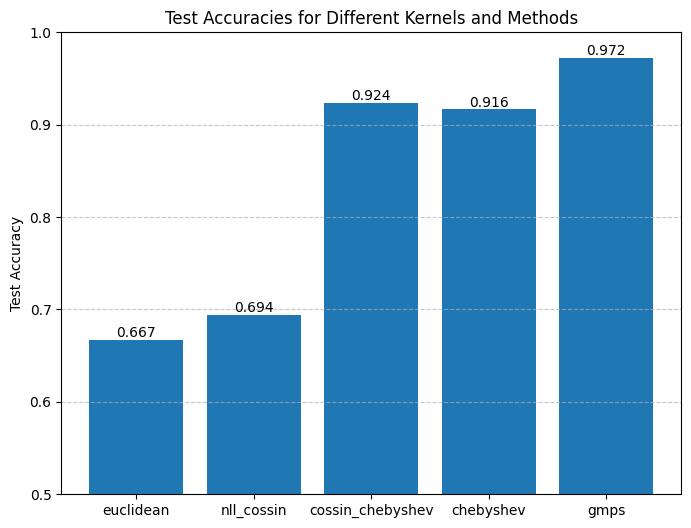

In [20]:
plt.figure(figsize=(8, 6))
bars = plt.bar(test_accuracies.keys(), test_accuracies.values())
plt.ylim(0.5, 1.0)
plt.ylabel("Test Accuracy")
plt.title("Test Accuracies for Different Kernels and Methods")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha="center", va="bottom")

#### 再次审视 4.7 中的 GTNC 方法

GTNC实现了KNN，其中**各个聚类中心**由生成式张量网络态进行参数化与近似；

聚类中心无近似下的懒惰态出现严重过拟合；MPS的有限虚拟维数近似有效抑制了过拟合；

将GTNC看作为由张量网络参数化的支持向量机(SVM)：特征映射对应于SVM中的升维过程，$p(y|c) = p(y|c')$实际为升维后希尔伯特空间中$c$与$c'$类间的分类边界，那么显然该边界由对应的两个生成式张量网络态实现参数化。

在GTNC的实际优化过程中，我们遵循了单分类的限制，即各个生成式张量网络态仅通过对应类别的样本进行优化。